In [3]:
import numpy as np
from matplotlib import pyplot as plt


The field, as well as points A and B as in the manual (0 - empty cell, 1 - wall, 2 - point A, 3 - point B):

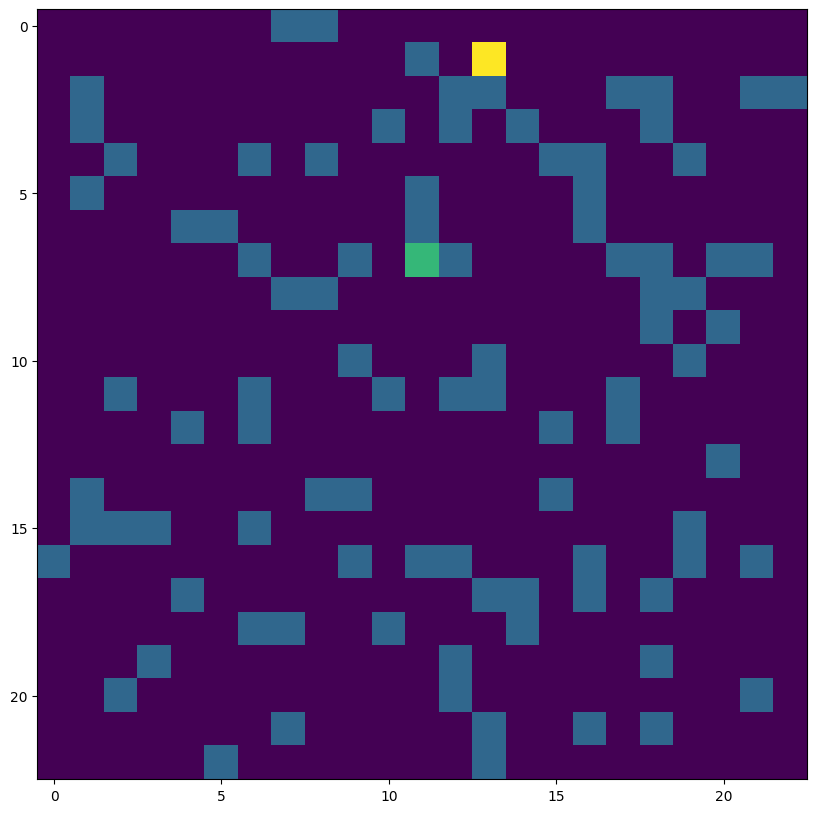

In [4]:
maze = [[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1],
         [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0],
         [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
         [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
         [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
         [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
         [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
         [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

A = (7, 11)
B = (1, 13)

maze[A[0]][A[1]] = 2
maze[B[0]][B[1]] = 3

plt.figure(figsize=(10, 10))
plt.imshow(maze)

1) Wave algorithm

In [5]:
def wave_shortest_path(maze, init_point, destination_point, diags=False):
    A_x, A_y = init_point[0], init_point[1]
    B_x, B_y = destination_point[0], destination_point[1]
    maze[A_x][A_y] = 0
    maze[B_x][B_y] = 0

    parents_X = np.zeros(
        np.array(maze).shape
    )  # X-coordinate of the parent cell to restore the answer (-1 - the parent is not defined)
    parents_X -= 1
    parents_X = parents_X.astype(int)

    parents_Y = np.zeros(
        np.array(maze).shape
    )  # Y-coordinate of the parent cell to restore the answer (-1 - the parent is not defined)
    parents_Y -= 1
    parents_Y = parents_Y.astype(int)

    distances = np.zeros(
        np.array(maze).shape
    )  # minimum distance from init_point to current cell (-1 - distance is undefined or infinite)
    distances -= 1
    distances = distances.astype(int)

    distances[A_x][A_y] = 0

    queue = [(A_x, A_y)]

    while len(queue) > 0:
        cur_point = queue[0]
        queue = queue[1:]

        if (
                cur_point[0] == B_x and cur_point[1] == B_y
        ):  # we have reached our destination
            break

        for x in range(-1, 2):
            for y in range(-1, 2):  # iterate over all neighbors
                if abs(x) + abs(y) == 0:  # you can't go out of the cell into yourself
                    continue
                if (
                        abs(x) + abs(y) > 1 and not diags
                ):  # you can't go diagonally if diags=False
                    continue
                new_point_X = cur_point[0] + x
                new_point_Y = cur_point[1] + y
                if (
                        new_point_X < 0
                        or new_point_X >= distances.shape[0]
                        or new_point_Y < 0
                        or new_point_Y >= distances.shape[1]
                ):  # cell is out of field
                    continue
                if maze[new_point_X][new_point_Y] != 0:  #  wall
                    continue
                if (
                        distances[new_point_X][new_point_Y] != -1
                ):  # we've already been there
                    continue

                # if we did get here, update the distances and the parent cell
                distances[new_point_X][new_point_Y] = (
                        distances[cur_point[0]][cur_point[1]] + 1
                )

                parents_X[new_point_X][new_point_Y] = cur_point[0]
                parents_Y[new_point_X][new_point_Y] = cur_point[1]

                queue.append((new_point_X, new_point_Y))

    total_path = [(B_x, B_y)]  # restoring the path

    cur_point = (B_x, B_y)
    while cur_point != (A_x, A_y):
        next_point = (
            parents_X[cur_point[0]][cur_point[1]],
            parents_Y[cur_point[0]][cur_point[1]],
        )
        total_path.append(next_point)
        cur_point = next_point

    total_path = list(reversed(total_path))
    return total_path


In [6]:
path = wave_shortest_path(maze, A, B) # shortest path from A to B over cells that have a common side
path_diag = wave_shortest_path(maze, A, B, True) # shortest path from A to B over cells that have a common side or vertex

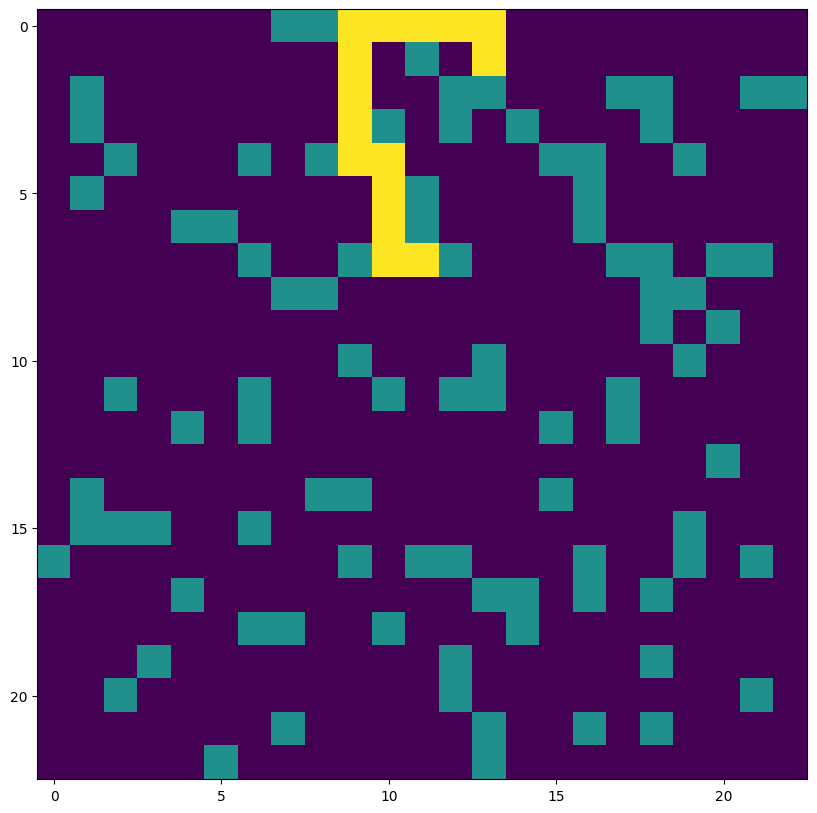

In [7]:
maze_with_path = np.copy(maze)
for p in path:
    maze_with_path[p[0]][p[1]] = 2

plt.figure(figsize=(10, 10))
plt.imshow(maze_with_path)

And the shortest path from A to B over cells that have a common side or vertex:

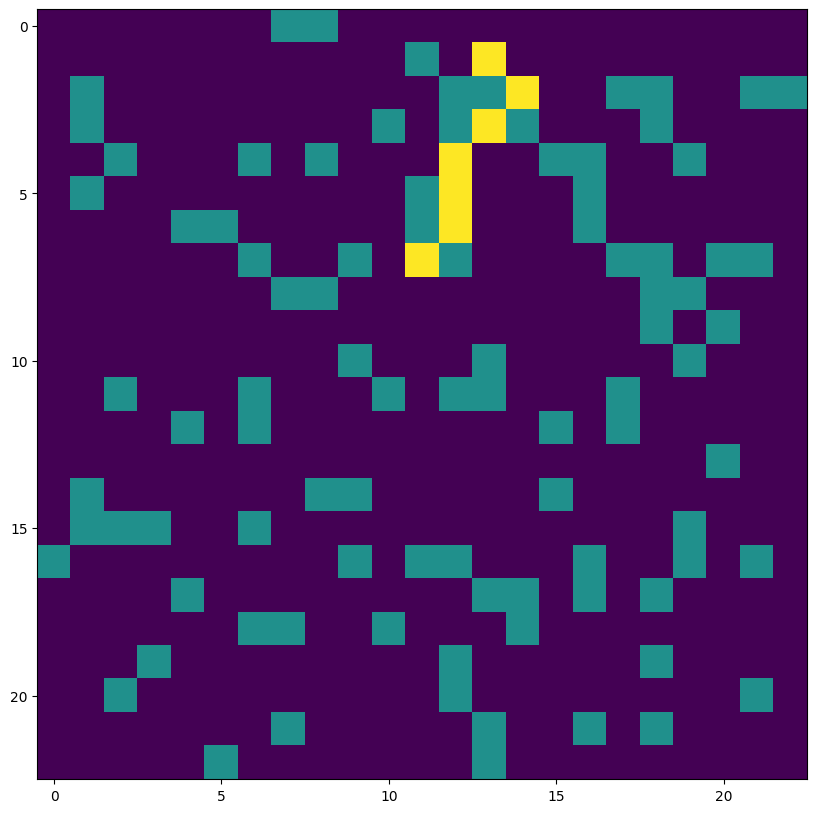

In [8]:
maze_with_path_diag = np.copy(maze)
for p in path_diag:
  maze_with_path_diag[p[0]][p[1]] = 2

plt.figure(figsize=(10, 10))
plt.imshow(maze_with_path_diag)

2) A* algorithm